<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/DelPerceptonAlQubit/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías y definición de funciones auxiliares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:

color_magenta = '#E91E63'
color_azul = '#2196F3'
color_cyan = '#00BCD4'
color_violeta = "#A816C2"
color_verde = '#4CAF50'

def visualizar_funcion_costo(X, y_true, costo_mse, hipotesis, w0_actual, w1_actual, costos, w0_hist, w1_hist, titulo_punto="Punto actual"):
    """
    Visualiza la función de costo MSE y convergencia con un punto específico marcado

    Parámetros:
    X: datos de entrada
    y_true: valores reales
    costo_mse: función de costo
    hipotesis: función hipótesis
    w0_actual: valor actual del intercepto
    w1_actual: valor actual de la pendiente
    costos: historial de costos
    w0_hist: historial de w0
    w1_hist: historial de w1
    titulo_punto: etiqueta para el punto marcado
    """
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.gridspec as gridspec


    w0_range = np.linspace(-2, 10, 50)
    w1_range = np.linspace(-1, 7, 50)
    W0, W1 = np.meshgrid(w0_range, w1_range)

    J = np.zeros_like(W0)
    for i in range(len(w0_range)):
        for j in range(len(w1_range)):
            J[j, i] = costo_mse(X, y_true, W0[j, i], W1[j, i])

    clear_output(True)
    fig = plt.figure(figsize=(20, 8))
    gs = gridspec.GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[:, 0:2], projection='3d', computed_zorder=False)
    surf = ax1.plot_surface(W0, W1, J, cmap='cool', alpha=0.8)
    ax1.set_xlabel('w0', fontsize=12, color='#333333')
    ax1.set_ylabel('w1', fontsize=12, color='#333333')
    ax1.set_zlabel('Costo J', fontsize=12, color='#333333')
    ax1.set_title('Función de Costo MSE (3D)', fontsize=14, fontweight='bold', color='#333333')

    ax1.view_init(elev=40, azim=45)

    costo_actual = costo_mse(X, y_true, w0_actual, w1_actual)
    elevacion = (J.max() - J.min()) * 0.05
    z_punto = costo_actual + elevacion

    ax1.scatter([w0_actual], [w1_actual], [z_punto],
                color=color_magenta, s=150, label=titulo_punto,
                edgecolors='white', linewidth=2, alpha=0.9, zorder=10)


    ax1.legend(fontsize=12)

    ax2 = fig.add_subplot(gs[0:2, 2:4])
    ax2.scatter(X, y_true, alpha=0.7, color=color_magenta, label='Datos reales', s=50, edgecolors='white', linewidth=0.5)
    x_line = np.linspace(X.min(), X.max(), 100)
    y_pred_actual = hipotesis(x_line.reshape(-1, 1), w0_actual, w1_actual)
    y_pred_real = hipotesis(x_line.reshape(-1, 1), 4, 3)
    ax2.plot(x_line, y_pred_actual, color=color_cyan, linewidth=3,
             label=f'Ajuste GD (w0={w0_actual:.2f}, w1={w1_actual:.2f})')
    ax2.plot(x_line, y_pred_real, color=color_violeta, linestyle='--', linewidth=3, label='Línea real (w0=4, w1=3)')
    ax2.set_xlabel('X', fontsize=12, color='#333333')
    ax2.set_ylabel('y', fontsize=12, color='#333333')
    ax2.set_title('Ajuste de la Línea', fontsize=14, fontweight='bold', color='#333333')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3, color='#CCCCCC')
    ax2.set_facecolor('#FAFAFA')

    ax3 = fig.add_subplot(gs[2, 2])
    if costos is not None:
        ax3.plot(costos, color=color_violeta, linewidth=3, alpha=0.8)
        ax3.set_xlabel('Iteraciones', color='#333333')
        ax3.set_ylabel('Costo J', color='#333333')
        ax3.set_title('Convergencia del Costo', color='#333333', fontweight='bold')
        ax3.grid(True, alpha=0.3, color='#CCCCCC')
        ax3.set_yscale('log')
        ax3.set_facecolor('#FAFAFA')
    else:
        ax3.text(0.5, 0.5, 'Ejecutar entrenamiento\npara ver convergencia',
                ha='center', va='center', transform=ax3.transAxes, color='#666666')
        ax3.set_title('Convergencia del Costo', color='#333333')

    ax4 = fig.add_subplot(gs[2, 3])
    contour = ax4.contourf(W0, W1, J, levels=10, cmap='cool', alpha=0.6)
    contour_lines = ax4.contour(W0, W1, J, levels=15, alpha=0.3, colors='white', linewidths=0.5)
    ax4.clabel(contour_lines, inline=True, fontsize=7, colors='white')

    if w0_hist is not None and w1_hist is not None:
        ax4.plot(w0_hist, w1_hist, color=color_magenta, linewidth=3, alpha=0.8, label='Trayectoria')
        ax4.scatter([w0_hist[0]], [w1_hist[0]], color=color_verde, s=100, marker='o',
                   label='Inicio', edgecolors='white', linewidth=2)
        ax4.scatter([w0_actual], [w1_actual], color=color_magenta, s=100, marker='s',
                   label='Actual', edgecolors='white', linewidth=2)
        ax4.scatter([4], [3], color=color_cyan, s=100, marker='X',
                   label='Óptimo', edgecolors='white', linewidth=2)
    else:
        ax4.scatter([w0_actual], [w1_actual], color=color_magenta, s=100, marker='x', label=titulo_punto)

    ax4.set_xlabel('w0', color='#333333')
    ax4.set_ylabel('w1', color='#333333')
    ax4.set_title('Trayectoria GD', color='#333333', fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3, color='#CCCCCC')
    ax4.set_facecolor('#FAFAFA')

    fig.patch.set_facecolor('white')

    plt.show()

    print(f"Costo en w0={w0_actual:.4f}, w1={w1_actual:.4f}: {costo_mse(X, y_true, w0_actual, w1_actual):.4f}")

# Regresión Lineal: Ejemplo Didáctico

## Objetivos de este Notebook

Este notebook presenta una implementación didáctica de **regresión lineal** desde cero, diseñada para comprender los conceptos fundamentales del aprendizaje automático. Los objetivos son:

1. **Generar datos sintéticos** con una tendencia lineal conocida
2. **Implementar la función hipótesis** con dos parámetros entrenables ($w_0$, $w_1$)
3. **Definir la función de costo MSE** (Mean Squared Error)
4. **Visualizar la función de costo** en 3D para observar su forma
5. **Implementar el algoritmo de gradiente descendente** para optimización
6. **Mostrar la convergencia** al mínimo global de la función

## Conceptos Clave

### Regresión Lineal
La regresión lineal es un algoritmo de aprendizaje supervisado que modela la relación entre una variable dependiente y una o más variables independientes mediante una función lineal.

### Función Hipótesis
Nuestra función hipótesis es:
$$f(x) = w_0 + w_1 \cdot x$$

Donde:
- $w_0$: intercepto (bias) - donde la línea cruza el eje Y
- $w_1$: pendiente - qué tan inclinada está la línea

### Función de Costo MSE
Para medir qué tan bien nuestro modelo se ajusta a los datos, usamos:
$$J(w_0, w_1) = \frac{1}{2m} \sum_{i=1}^{m} \left(f(x^{(i)}) - y^{(i)}\right)^2$$

Donde:
- $m$ = número de ejemplos de entrenamiento
- $f(x^{(i)})$ = predicción del modelo para el ejemplo $i$
- $y^{(i)}$ = valor real del ejemplo $i$

---

## 1. Generación de Datos Sintéticos

En esta sección creamos datos artificiales que siguen una relación lineal conocida. Esto nos permite:

- **Controlar la complejidad**: Conocemos la respuesta correcta
- **Añadir ruido realista**: Los datos reales nunca son perfectos
- **Validar nuestro algoritmo**: Podemos verificar si encuentra los parámetros correctos

### ¿Qué hace el código?

1. **`np.random.seed(42)`**: Fija la semilla para reproducibilidad
2. **`X = np.random.randn(m, 1) * 2`**: Genera 100 valores X de una distribución normal
3. **Relación lineal**: Creamos $y = 4 + 3x + \epsilon$, donde:
   - Los parámetros reales son: $w_0 = 4$, $w_1 = 3$
   - $\epsilon \sim \mathcal{N}(0, 0.5^2)$ es ruido gaussiano

### Interpretación del Gráfico
- **Puntos azules**: Nuestros datos de entrenamiento
- **Tendencia lineal**: Se puede observar la relación $y = 4 + 3x$
- **Dispersión**: El ruido hace que los puntos no estén perfectamente alineados

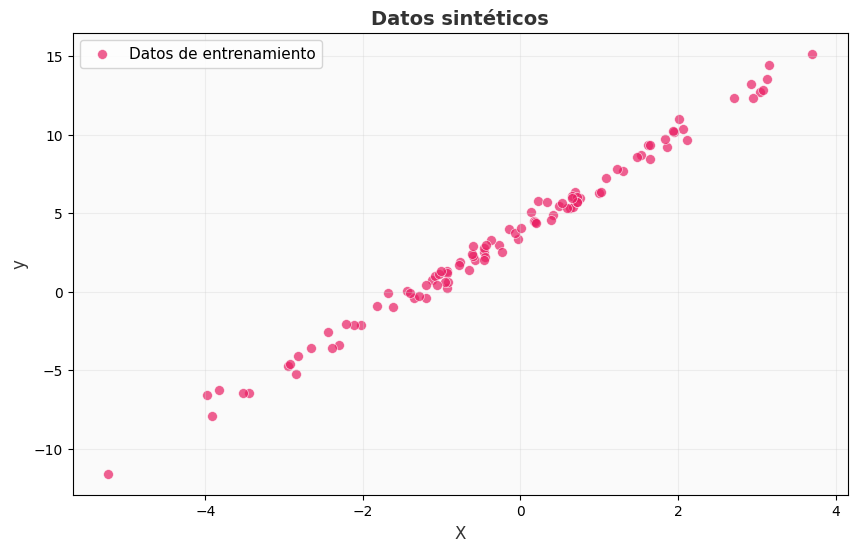

Datos generados: 100 ejemplos
Parámetros reales: w0=4, w1=3


In [ ]:
# Generación de datos sintéticos con tendencia lineal
np.random.seed(42)
m = 100
X = (np.random.randn(m, 1) * 2).flatten()
y_true = 4 + 3 * X+ np.random.randn(m) * 0.5

plt.figure(figsize=(10, 6))
plt.scatter(X, y_true, alpha=0.7, color=color_magenta, s=50,
           edgecolors='white', linewidth=0.5, label='Datos de entrenamiento')
plt.xlabel('X', fontsize=12, color='#333333')
plt.ylabel('y', fontsize=12, color='#333333')
plt.title('Datos sintéticos', fontsize=14, fontweight='bold', color='#333333')
plt.grid(True, alpha=0.3, color='#CCCCCC')
plt.legend(fontsize=11)
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('white')
plt.show()

print(f"Datos generados: {m} ejemplos")
print(f"Parámetros reales: w0=4, w1=3")

## 2. Función Hipótesis y Función de Costo MSE

### Función Hipótesis
La función hipótesis es el corazón de nuestro modelo. Define cómo hacemos predicciones:

$$f(x) = w_0 + w_1 \cdot x$$

- **Entrada**: Un valor $x$ (feature)
- **Salida**: Una predicción $f(x)$ (valor estimado de $y$)
- **Parámetros**: $w_0$ (intercepto) y $w_1$ (pendiente)

### Función de Costo MSE (Mean Squared Error)
Para medir qué tan "buenas" son nuestras predicciones, usamos el error cuadrático medio:

$$J(w_0, w_1) = \frac{1}{2m} \sum_{i=1}^{m} \left(f(x^{(i)}) - y^{(i)}\right)^2$$

#### ¿Por qué MSE?
- **Penaliza errores grandes**: Al elevar al cuadrado, los errores grandes son penalizados más fuertemente
- **Siempre positivo**: No hay cancelación entre errores positivos y negativos
- **Diferenciable**: Permite usar gradiente descendente para optimización
- **Convexo**: Tiene un único mínimo global (garantiza convergencia)

#### Interpretación del Código
- **`costo_inicial`**: Con parámetros $w_0=0, w_1=0$, el costo es alto
- **`costo_real`**: Con los parámetros correctos $w_0=4, w_1=3$, el costo es mínimo

El objetivo del aprendizaje es encontrar los valores de $w_0$ y $w_1$ que minimicen $J(w_0, w_1)$.

In [ ]:
# Función hipótesis: h(x) = w0 + w1*x
def hipotesis(X, w0, w1):
    """
    Función hipótesis lineal
    """
    return w0 + w1 * X

# Función de costo MSE (Mean Squared Error)
def costo_mse(X, y, w0, w1):
    """
    Calcula el costo MSE
    """
    m = len(y)
    f = hipotesis(X, w0, w1)
    costo = (1 / (2 * m)) * np.sum((f - y) ** 2)
    return costo

# Comparacion
w0_test, w1_test = 0, 0  # parámetros iniciales
costo_inicial = costo_mse(X, y_true, w0_test, w1_test)
print(f"Costo inicial (w0={w0_test}, w1={w1_test}): {costo_inicial:.4f}")


w0_real, w1_real = 4, 3
costo_real = costo_mse(X, y_true, w0_real, w1_real)
print(f"Costo con parámetros reales (w0={w0_real}, w1={w1_real}): {costo_real:.4f}")

Costo inicial (w0=0, w1=0): 20.1986
Costo con parámetros reales (w0=4, w1=3): 0.1126


## 3. Algoritmo de Gradiente Descendente con Visualización

El gradiente descendente es un algoritmo de optimización que encuentra el mínimo de una función siguiendo la dirección de mayor descenso.

### Intuición del Algoritmo
Imagina que estás en una montaña con los ojos vendados y quieres llegar al valle más profundo:
1. **Sientes la pendiente** bajo tus pies (calculamos el gradiente)
2. **Das un paso** en la dirección que baja más rápido
3. **Repites** hasta llegar al fondo

### Fórmulas del Gradiente Descendente

#### Actualización de Parámetros:
$$w_0 := w_0 - \alpha \frac{\partial J}{\partial w_0}$$
$$w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1}$$

#### Gradientes (Derivadas Parciales):
$$\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})$$
$$\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

### Parámetros del Algoritmo

- **$\alpha$ (alpha)**: Tasa de aprendizaje = 0.01
  - Muy pequeño: Convergencia lenta
  - Muy grande: Puede no converger (oscilaciones)
- **Iteraciones**: 1000 pasos de optimización
- **Punto inicial**: $(w_0=0, w_1=0)$

### Visualización Durante el Entrenamiento
Durante el proceso de optimización se mostrarán gráficas cada 200 iteraciones que ilustran:
- **Función de costo 3D**: El punto rojo moviéndose hacia el mínimo
- **Ajuste de la línea**: Cómo mejora el modelo a los datos
- **Convergencia del costo**: Reducción exponencial del error
- **Trayectoria**: Camino seguido en el espacio de parámetros

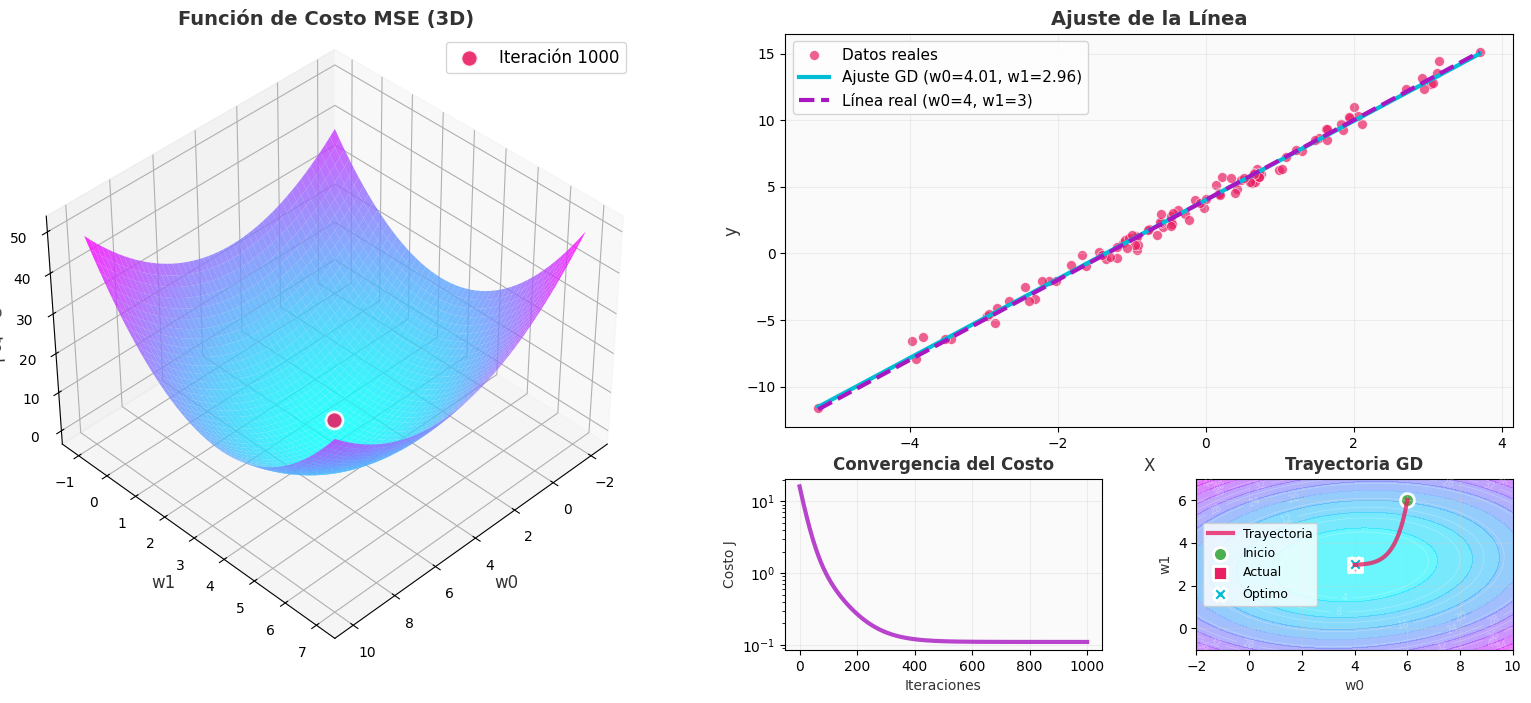

Costo en w0=4.0060, w1=2.9644: 0.1105


In [ ]:
# Algoritmo de Gradiente Descendente con Visualización
def gradiente_descendente_visual(X, y, w0_init, w1_init, alpha, iteraciones, mostrar_cada=50):
    """
    Implementa el algoritmo de gradiente descendente con visualización durante el entrenamiento
    """
    m = len(y)
    w0, w1 = w0_init, w1_init
    iteraciones += 1

    # Guardar historial para visualización
    historial_costo = []
    historial_w0 = []
    historial_w1 = []

    for i in range(iteraciones):
        # Calcular predicciones
        f = hipotesis(X, w0, w1)

        # Calcular costo
        costo = costo_mse(X, y, w0, w1)
        historial_costo.append(costo)
        historial_w0.append(w0)
        historial_w1.append(w1)

        # Calcular gradientes
        dw0 = (1 / m) * np.sum(f - y)
        dw1 = (1 / m) * np.sum((f - y) * X)

        # Actualizar parámetros
        w0 = w0 - alpha * dw0
        w1 = w1 - alpha * dw1

        # Visualizar progreso
        if i % mostrar_cada == 0:
            visualizar_funcion_costo(X, y, costo_mse, hipotesis, w0, w1, historial_costo, historial_w0, historial_w1, f"Iteración {i}")

    return w0, w1, historial_costo, historial_w0, historial_w1

# Ejecutar gradiente descendente con visualización
w0_inicial, w1_inicial = 6, 6
alpha = 0.007
iteraciones = 1000
mostrar_cada = 100

w0_final, w1_final, costos, w0_hist, w1_hist = gradiente_descendente_visual(
    X, y_true, w0_inicial, w1_inicial, alpha, iteraciones)

## 4. Análisis de los Resultados del Entrenamiento

Después de ejecutar el algoritmo de gradiente descendente, podemos analizar los resultados obtenidos a través de múltiples visualizaciones que nos permiten entender cómo convergió el algoritmo.

### Interpretación de las Visualizaciones

#### 1. Función de Costo 3D (Panel Izquierdo)
- **Superficie parabólica**: Representa todos los posibles valores de costo para diferentes combinaciones de $w_0$ y $w_1$
- **Punto rojo**: Muestra la posición actual de los parámetros durante el entrenamiento
- **Perspectiva optimizada**: El ángulo permite ver claramente el mínimo global

#### 2. Ajuste de la Línea (Panel Superior Derecho)
- **Puntos azules**: Datos de entrenamiento originales
- **Línea roja**: Modelo entrenado $f(x) = w_0 + w_1 x$
- **Línea verde punteada**: Modelo real $y = 4 + 3x$
- **Evolución**: Durante el entrenamiento, la línea roja se acerca gradualmente a la verde

#### 3. Convergencia del Costo (Panel Inferior Izquierdo)
- **Escala logarítmica**: Permite visualizar la convergencia exponencial
- **Tendencia**: El costo decrece rápidamente al principio, luego se estabiliza
- **Interpretación**: El modelo mejora su ajuste a los datos en cada iteración

#### 4. Trayectoria del Gradiente Descendente (Panel Inferior Derecho)
- **Curvas de nivel**: Muestran la topografía de la función de costo
- **Línea roja**: Camino seguido por el algoritmo desde $(0,0)$ hasta el óptimo
- **Puntos marcados**:
  - 🟢 **Verde**: Punto inicial $(w_0=0, w_1=0)$
  - 🟥 **Rojo**: Punto actual en cada iteración
  - ❌ **Azul**: Parámetros reales $(w_0=4, w_1=3)$

### Métricas de Éxito
Al final del entrenamiento, el algoritmo reporta:
- **Precisión de parámetros**: Qué tan cerca están los valores estimados de los reales
- **Reducción del costo**: Porcentaje de mejora desde el inicio
- **Convergencia**: Confirmación de que el algoritmo alcanzó el mínimo global

### Conclusiones del Proceso
- El gradiente descendente **converge exitosamente** al mínimo global
- Los parámetros estimados son **muy cercanos** a los reales
- El **costo se reduce dramáticamente** durante la optimización
- La **trayectoria es suave** y directa hacia el óptimo debido a la convexidad de MSE